Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

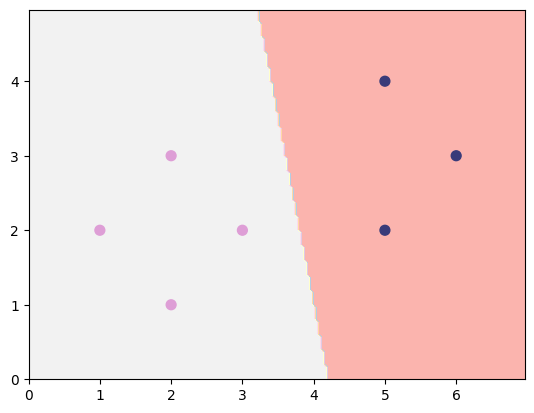

In [5]:
clf = RidgeClassifier(0).fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, clf.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

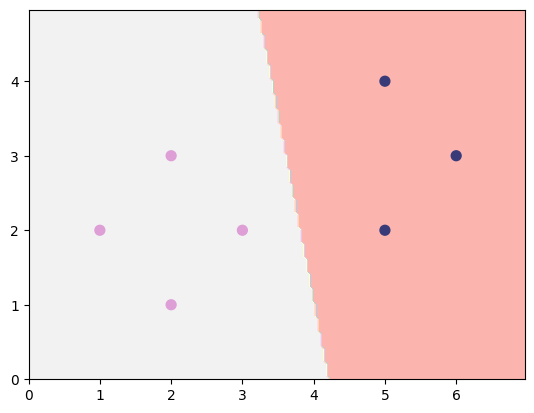

In [6]:
clf = LinearRegression().fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, lambda x: clf.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

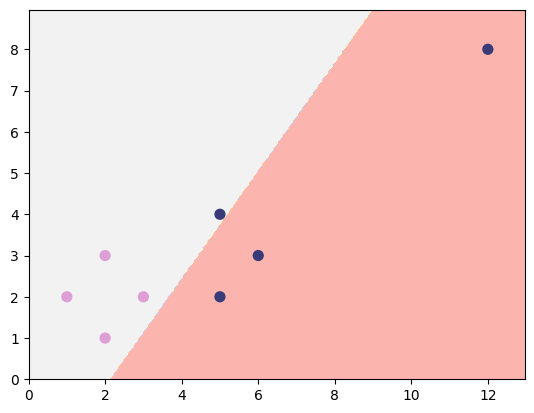

In [8]:
clf = RidgeClassifier(0).fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

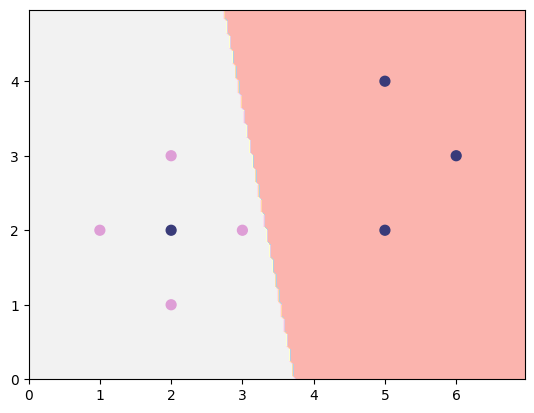

In [10]:
clf = RidgeClassifier(0).fit(unsep_X, unsep_y)

plot_2d_clf_problem(unsep_X, unsep_y, clf.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

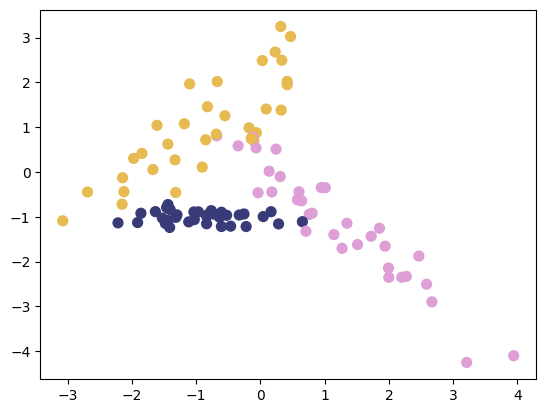

In [11]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features = 2, n_classes = 3, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

Klasifikacije zasebnih klasifikatora


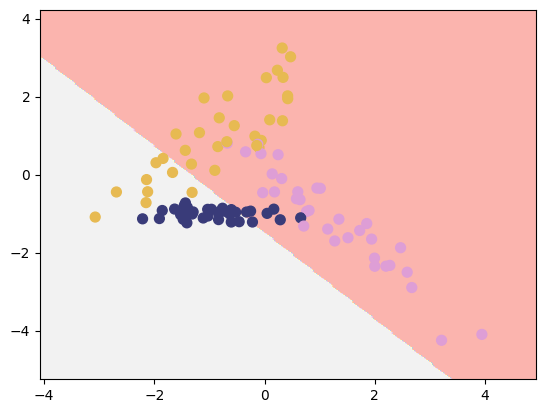

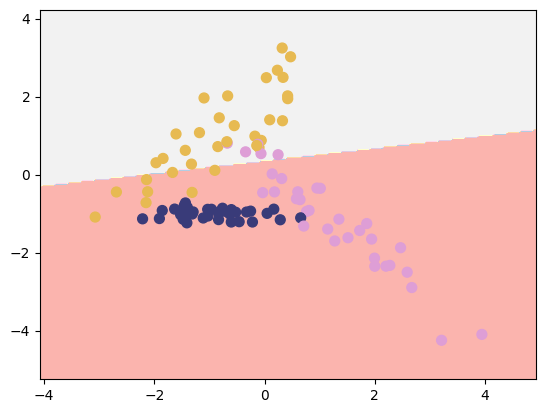

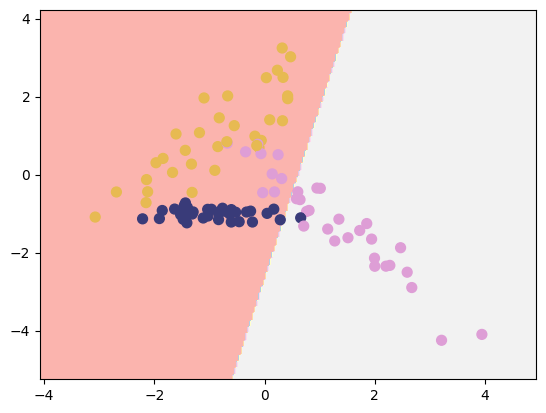


Rezultat funkcije predict: 


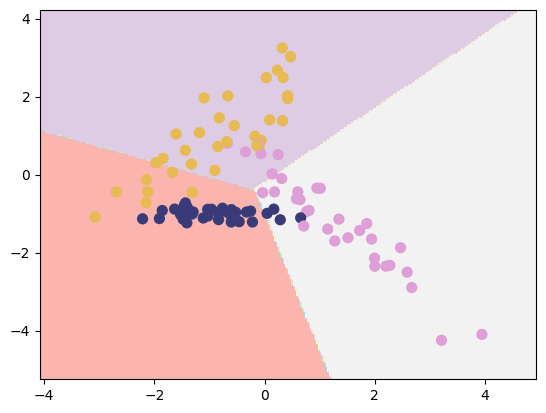


Rezultat modela RidgeClassifier: 


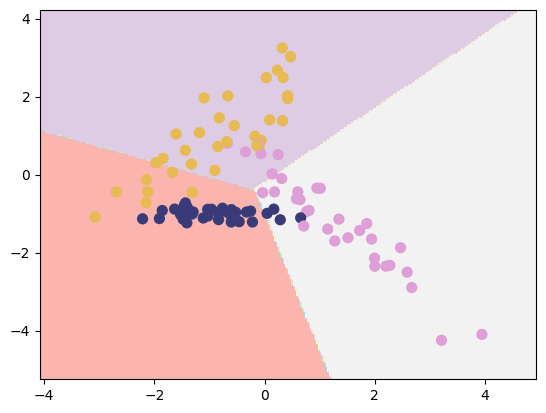

In [12]:
y1 = np.where(y == 0, 1, 0)
y2 = np.where(y == 1, 1, 0)
y3 = np.where(y == 2, 1, 0)

clf1 = LinearRegression().fit(X, y1)
clf2 = LinearRegression().fit(X, y2)
clf3 = LinearRegression().fit(X, y3)

print("Klasifikacije zasebnih klasifikatora")
plot_2d_clf_problem(X, y, lambda x: clf1.predict(x) >= 0.5)
plt.show()
plot_2d_clf_problem(X, y, lambda x: clf2.predict(x) >= 0.5)
plt.show()
plot_2d_clf_problem(X, y, lambda x: clf3.predict(x) >= 0.5)
plt.show()

def predict(X):
    preds = np.array([clf1.predict(X), clf2.predict(X), clf3.predict(X)])
    clfs = np.argmax(preds, axis = 0)
    return clfs

print("\nRezultat funkcije predict: ")
plot_2d_clf_problem(X, y, predict)
plt.show()

print("\nRezultat modela RidgeClassifier: ")
ridge_clf = RidgeClassifier(0).fit(X, y)
plot_2d_clf_problem(X, y, ridge_clf.predict)
plt.show()


### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

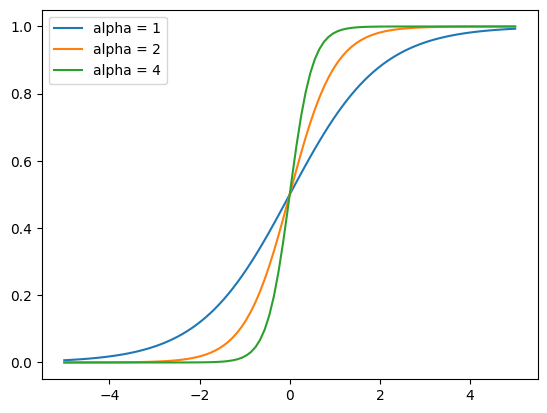

In [13]:
def sigm(x, alpha = 1):
    return 1/(1 + np.exp(-alpha * x))

x = np.linspace(-5, 5, 100)
for alpha in [1, 2, 4]:
    plt.plot(x, sigm(x, alpha), label = f"alpha = {alpha}")
plt.legend()
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
from numpy import linalg

#Funkcija predikcije;
# prima matricu primjera X (N x n) i vektor tezina w (1 x n) te vraca vektor predikcija y (N x 1)
# (Na taj nacin radi i za cijelu matricu primjera i za samo jedan primjer te odrzava potrebne dimenzije y)
def lr_h(X, w):
    return sigm(X @ w.T)
    
def cross_entropy_error(X, y, w, alpha = 0):
    N = X.shape[0]
    temp = -y * np.log(lr_h(X, w)) - (1 - y) * np.log(1 - lr_h(X, w))
    result = temp.sum()
    if alpha != 0:
        result += alpha/2 * w.T@w
    return result / N

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    
    dummy_ones = np.ones(X.shape[0])
    X = np.column_stack((dummy_ones, X))
    
    w = np.zeros(X.shape[1])
    trace_array = np.array([w])
    
    current_error = cross_entropy_error(X, y, w, alpha)
    prev_error = 0
    
    k = 0
    while k < max_iter:
        
        if abs(prev_error - current_error) < epsilon:
            break
            
        delta_w0 = 0
        delta_w = np.zeros(X.shape[0])
        
        h = lr_h(X, w)
        class_difference = (h - y).reshape((y.shape[0], 1))
        delta_w0 = np.sum(class_difference)
        delta_w = np.sum((class_difference) * X[:, 1:], axis = 0)
        
        w[0] = w[0] - eta * delta_w0
        w[1:] = w[1:] * (1 - eta * alpha) - eta * delta_w
        
        if trace:
            trace_array = np.vstack((trace_array, w))
            
        prev_error = current_error
        current_error = cross_entropy_error(X, y, w, alpha)
        k += 1
        
    if trace:
        return w, k, trace_array
    else:
        return w, k
        

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [15]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Tezine: [ 4.45449454 -1.71089242  0.68413507]
Za ucenje je bilo potrebno 947 iteracija.
Pogreska unakrsne entropije je: 0.13521872720206746


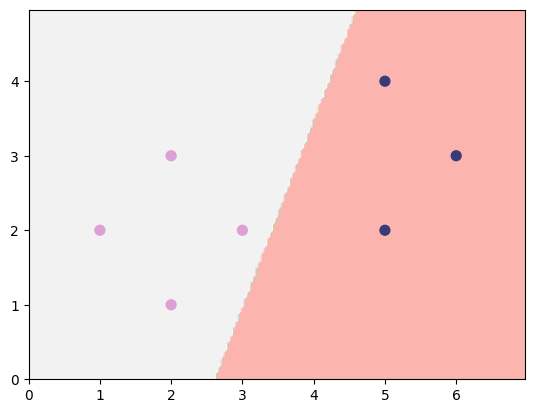

In [16]:
w, k = lr_train(seven_X, seven_y)
print(f"Tezine: {w}")
print(f"Za ucenje je bilo potrebno {k} iteracija.")

seven_X_dummies = np.column_stack((np.ones(seven_X.shape[0]), seven_X))
print(f"Pogreska unakrsne entropije je: {cross_entropy_error(seven_X_dummies, seven_y, w)}")

plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(np.hstack(([1], x)), w) >= 0.5)
plt.show()

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [17]:
from sklearn.metrics import zero_one_loss

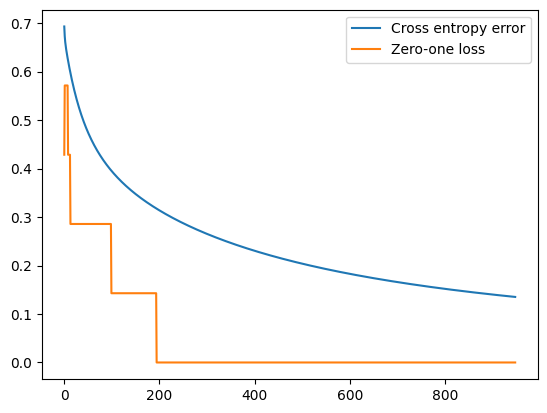

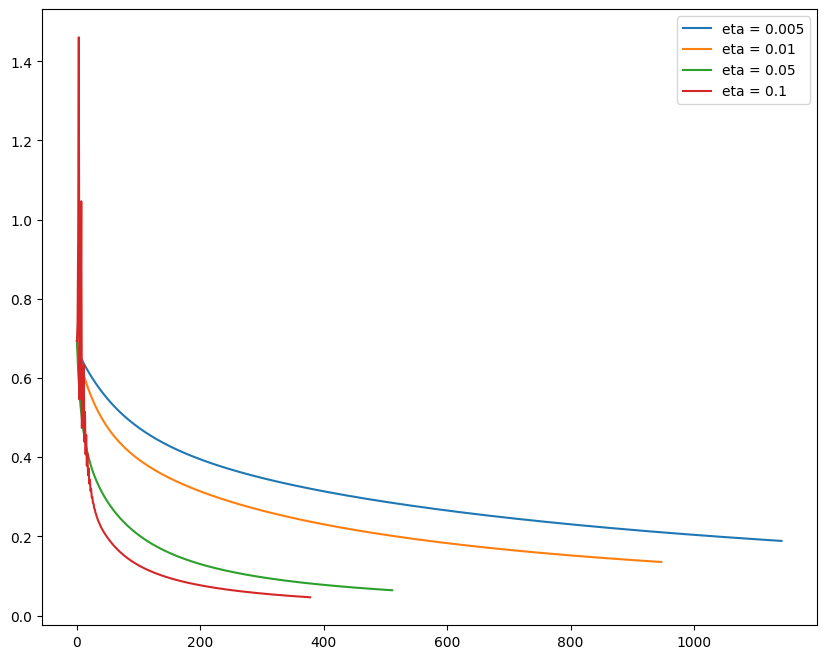

In [18]:
seven_X_dummies = np.column_stack((np.ones(seven_X.shape[0]), seven_X))

w, k, trace = lr_train(seven_X, seven_y, trace = True)

cross_error = np.array([])
zero_one_error = np.array([])

for wi in trace:
    cross_error = np.append(cross_error, [cross_entropy_error(seven_X_dummies, seven_y, wi)])
    y_pred = lr_h(seven_X_dummies, wi)
    y_pred = np.where(y_pred >= 0.5, 1, 0)
    zero_one_error = np.append(zero_one_error, zero_one_loss(seven_y, y_pred))
    
plt.plot(cross_error, label = "Cross entropy error")
plt.plot(zero_one_error, label = "Zero-one loss")
plt.legend()
plt.show()

plt.figure(figsize = (10, 8))
for eta in [0.005, 0.01, 0.05, 0.1]:
    w, k, trace = lr_train(seven_X, seven_y, eta = eta, trace = True)
    error = np.array([])
    for wi in trace:
        error = np.append(error, [cross_entropy_error(seven_X_dummies, seven_y, wi)])
    plt.plot(error, label=f"eta = {eta}")
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 1000).fit(seven_X, seven_y)

w = np.hstack((clf.intercept_, clf.coef_[0]))

print(f"Konacne tezine su: {w}")
print(f"Za ucenje je bilo potrebno {clf.n_iter_[0]} iteracija.")
print(f"Pogreska unakrsne entropije: {cross_entropy_error(seven_X_dummies, seven_y, w)}")

Konacne tezine su: [ 5.33129609 -1.18244419 -0.30251926]
Za ucenje je bilo potrebno 13 iteracija.
Pogreska unakrsne entropije: 0.13883567936315613


### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

In [20]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

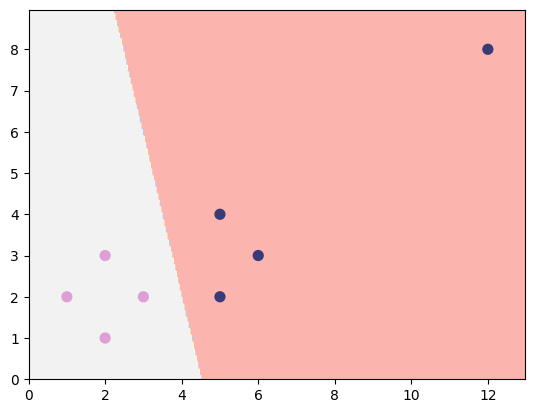

In [21]:
clf = LogisticRegression(max_iter = 1000).fit(outlier_X, outlier_y)

plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

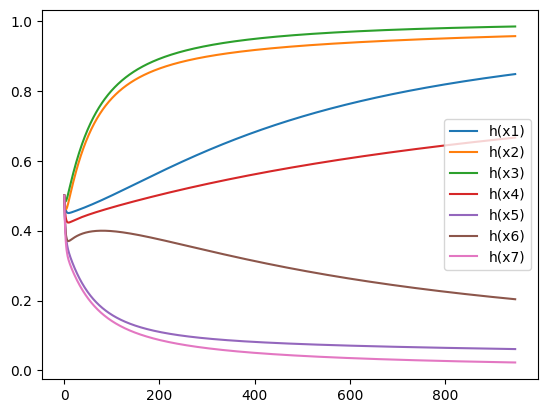

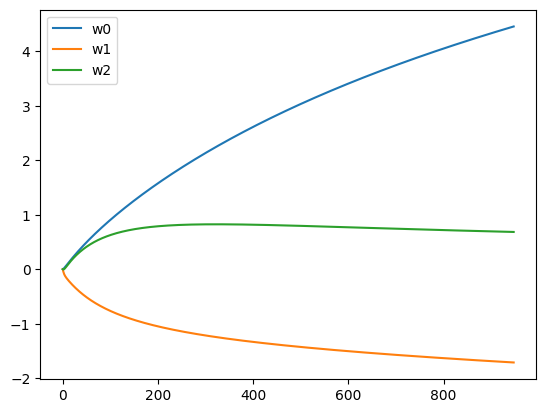

In [22]:
w, k, trace = lr_train(seven_X, seven_y, max_iter=1000, trace=True)

h = np.array([lr_h(seven_X_dummies, trace[0])]).T

for wi in trace:
    h = np.hstack((h, np.array([lr_h(seven_X_dummies, wi)]).T))

h = h[:, 1:]
    
for i in range(seven_X.shape[0]):
    plt.plot(h[i, :], label = f"h(x{i+1})")

plt.legend()
plt.show()

plt.plot(trace[:, 0], label="w0")
plt.plot(trace[:, 1], label="w1")
plt.plot(trace[:, 2], label="w2")
plt.legend()
plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [23]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

unsep_X_dummies = np.column_stack((np.ones(unsep_X.shape[0]), unsep_X))

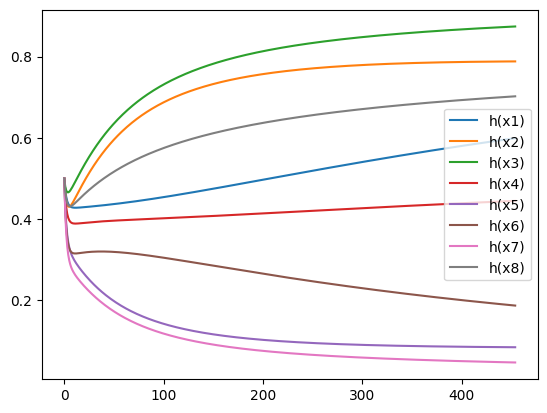

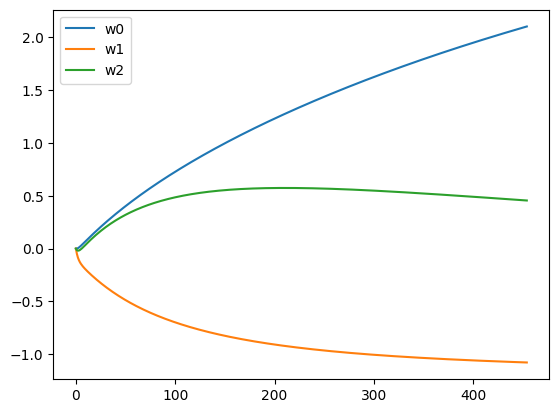

In [24]:
w, k, trace = lr_train(unsep_X, unsep_y, max_iter=1000, trace=True)

h = np.array([lr_h(unsep_X_dummies, trace[0])]).T

for wi in trace:
    h = np.hstack((h, np.array([lr_h(unsep_X_dummies, wi)]).T))

h = h[:, 1:]
    
for i in range(unsep_X.shape[0]):
    plt.plot(h[i, :], label = f"h(x{i+1})")

plt.legend()
plt.show()

plt.plot(trace[:, 0], label="w0")
plt.plot(trace[:, 1], label="w1")
plt.plot(trace[:, 2], label="w2")
plt.legend()
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [25]:
from numpy.linalg import norm

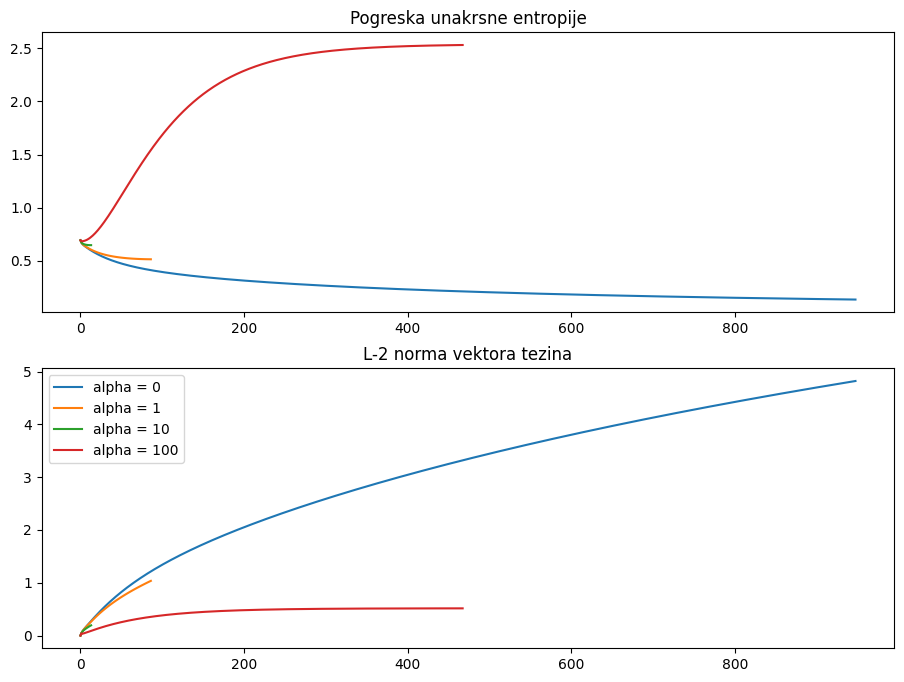

In [26]:
fig, ax = plt.subplots(2, 1, figsize = (11, 8))

for alpha in [0, 1, 10, 100]:
    w, k, trace = lr_train(seven_X, seven_y, alpha=alpha, max_iter=1000, trace=True)
    errors = np.array([])
    norms = np.array([])
    for wi in trace:
        errors = np.append(errors, cross_entropy_error(seven_X_dummies, seven_y, wi, alpha))
        norms = np.append(norms, norm(wi, ord=2))
    ax[0].plot(errors, label=f"alpha = {alpha}")
    ax[0].set_title("Pogreska unakrsne entropije")
    ax[1].plot(norms, label=f"alpha = {alpha}")
    ax[1].set_title("L-2 norma vektora tezina")
    
plt.legend()
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [27]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

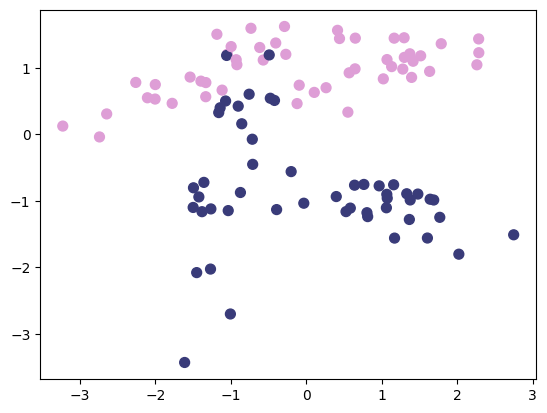

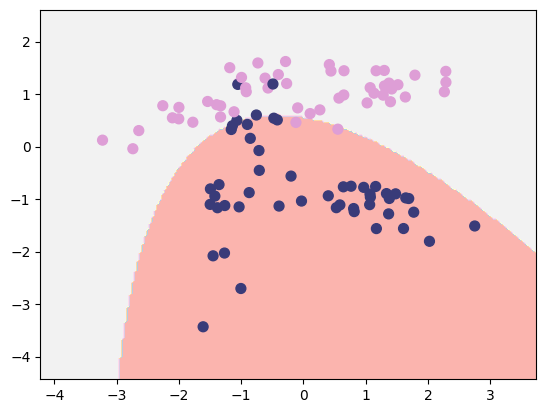

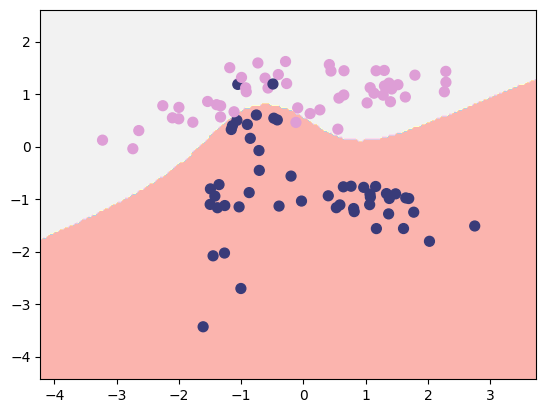

In [28]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features = 2, n_classes = 2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 2)
plot_2d_clf_problem(X, y)
plt.show()

for deg in [2, 3]:
    poly = PolynomialFeatures(deg)
    poly.fit(X)
    clf = LogisticRegression().fit(poly.transform(X)[:, 1:], y)
    plot_2d_clf_problem(X, y, lambda x: clf.predict(poly.transform(x)[:, 1:]))
    plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?